In [11]:
import pandas as pd
import metnum
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt

df_completo = pd.read_csv('../data/train.csv')
#Origen datos https://www.inegi.org.mx/temas/percepcion/#Informacion_general
df_extra = pd.read_csv('../data/percepcion_inseguridad.csv')

## Predicción de precio agregando indice de percepción de inseguridad por ciudad

In [12]:
#Ciudades que estan en ambos dataframe
ciudades = df_extra['ciudad']
for i in range(len(ciudades)):
    if (len(df_completo[df_completo['ciudad'] == ciudades[i]].index) > 0):
        print(ciudades[i])

Aguascalientes
Campeche
Colima
Chihuahua
Durango
Guanajuato
Hidalgo
Morelos
Puebla
Querétaro
Quintana Roo
San Luis Potosí
Sinaloa
Tlaxcala
Zacatecas


In [13]:
df_completo = pd.merge(df_completo, df_extra, on="ciudad")

In [17]:
df_completo['tipodepropiedad'].value_counts()

Casa                             23704
Apartamento                       3534
Casa en condominio                2517
Terreno                           1856
Local Comercial                    607
Terreno comercial                  421
Oficina comercial                  261
Bodega comercial                   218
Edificio                           102
Casa uso de suelo                   79
Otros                               29
Duplex                              29
Local en centro comercial           28
Quinta Vacacional                   23
Inmuebles productivos urbanos       19
Villa                               16
Rancho                              12
Nave industrial                      6
Huerta                               6
Departamento Compartido              6
Terreno industrial                   4
Name: tipodepropiedad, dtype: int64

In [32]:
propGroup = 'tipodepropiedad'
groups = [
    'Casa',
    'Apartamento',
    'Casa en condominio',
    'Local Comercial'
]
props = [
    'antiguedad',
    'metrostotales',
    'porcentaje'
]
pred = 'precio'

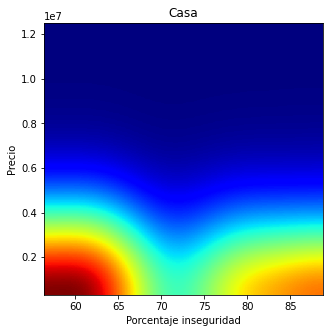

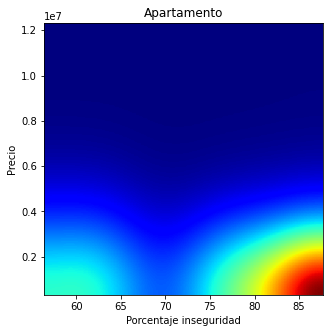

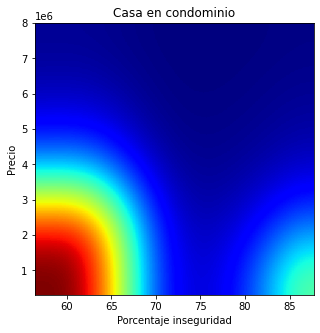

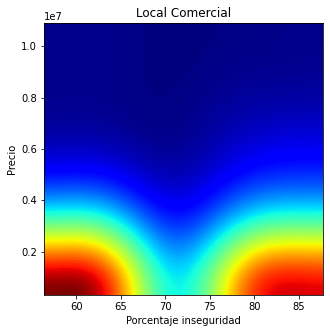

In [33]:
for i in range(len(groups)):
    df_group = df_completo[df_completo[propGroup]==groups[i]]
    fData = utils.filterData(df_group, props, pred)
    utils.showHeatMap(fData['porcentaje'], fData[pred], 'Porcentaje inseguridad', 'Precio', groups[i])

Se ve que en algunas propiedades es mas importante que en otras el tema de la seguridad

In [34]:
phis = [ 
        lambda x: (1/(x+1)), #antiguo
        lambda x: x, #metros2
        lambda x: (1/x**2) #porcentaje inseguridad
]

In [35]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Casa es de 0.4813424729357851
Error de precision para Apartamento es de 0.5478481028549543
Error de precision para Casa en condominio es de 0.3604318752238916
Error de precision para Local Comercial es de 0.6765855408306418
